# Redução de dimensionalidade

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from   sklearn.datasets import load_wine

## Redução de dimensionalidade via analise de componente principa
Extrai as features para transformar ou projetar os dados em outra nova feature espaça.

### PCA

1. Escalona as caracteristicas escolhidas
2. Constroe a matriz covariante
3. Decomposição da matriz covariante em auto vetores e auto valores
4. Ordena os auto valores em ordem decrescente para rankear os auto vetores correspondentes
5. Seleciona o K auto vetor, que correspond para k maior auto valor, onde k é a dimensão do novo sub-espaço features k<d
6. Constroe a projeçao da matriz,w,
7.  

In [ ]:
data = load_wine(as_frame=True)

In [ ]:
X = data.data
y = data.target

In [ ]:
X_ = X.iloc[:,1:].values

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_ = sc.fit_transform(X_)

In [ ]:
cov_mat = np.cov(X_.T)

In [ ]:
auto_vals, auto_vecs = np.linalg.eig(cov_mat)

In [ ]:
auto_pares = [(np.abs(auto_vals[i]),auto_vecs[:,i]) for i in range(len(auto_vals))]

In [ ]:
eigens = sorted(auto_pares, key=lambda x: x[0], reverse=True)

In [ ]:
W = np.hstack((eigens[0][1][:, np.newaxis] ,eigens[1][1][:, np.newaxis]))

In [ ]:
W

array([[-0.25929907, -0.22363659],
       [-0.01550401, -0.45446769],
       [-0.23457717, -0.08389744],
       [ 0.12997254, -0.41000066],
       [ 0.39396388, -0.14109614],
       [ 0.4262194 , -0.07041646],
       [-0.30156031, -0.01025314],
       [ 0.31599638, -0.13306564],
       [-0.12050505, -0.53637656],
       [ 0.31314859,  0.27207746],
       [ 0.38744   ,  0.11846639],
       [ 0.26504376, -0.38712793]])

In [ ]:
X_.dot(W)

array([[ 3.07857252e+00, -1.21926180e+00],
       [ 2.19079587e+00,  6.64568240e-01],
       [ 2.45644079e+00, -1.50581110e+00],
       [ 3.42275012e+00, -2.55605831e+00],
       [ 9.48975875e-01, -1.32973488e+00],
       [ 2.76731538e+00, -1.77985016e+00],
       [ 2.18375478e+00, -4.58036710e-01],
       [ 1.82632140e+00, -1.33985744e+00],
       [ 2.19383381e+00,  2.03202783e-01],
       [ 2.59000186e+00, -4.35609334e-01],
       [ 3.26089058e+00, -1.03803643e+00],
       [ 1.55488981e+00,  1.04878503e-01],
       [ 1.96567565e+00, -2.73148206e-01],
       [ 3.14743458e+00, -2.58202082e-01],
       [ 4.00629989e+00, -1.65773346e+00],
       [ 2.13051424e+00, -1.67993499e+00],
       [ 1.87351026e+00, -2.15937482e+00],
       [ 1.70365337e+00, -1.62849380e+00],
       [ 3.23817800e+00, -2.25696066e+00],
       [ 1.94408078e+00, -9.99518957e-01],
       [ 2.94642239e+00, -5.67121964e-01],
       [ 1.09489837e+00, -6.02002492e-01],
       [ 2.44560230e+00,  3.47433406e-01],
       [ 1.

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
X_ = PCA(n_components=2).fit_transform(X_)

In [ ]:
X_

array([[ 3.07857252e+00,  1.21926180e+00],
       [ 2.19079587e+00, -6.64568240e-01],
       [ 2.45644079e+00,  1.50581110e+00],
       [ 3.42275012e+00,  2.55605831e+00],
       [ 9.48975875e-01,  1.32973488e+00],
       [ 2.76731538e+00,  1.77985016e+00],
       [ 2.18375478e+00,  4.58036710e-01],
       [ 1.82632140e+00,  1.33985744e+00],
       [ 2.19383381e+00, -2.03202783e-01],
       [ 2.59000186e+00,  4.35609334e-01],
       [ 3.26089058e+00,  1.03803643e+00],
       [ 1.55488981e+00, -1.04878503e-01],
       [ 1.96567565e+00,  2.73148206e-01],
       [ 3.14743458e+00,  2.58202082e-01],
       [ 4.00629989e+00,  1.65773346e+00],
       [ 2.13051424e+00,  1.67993499e+00],
       [ 1.87351026e+00,  2.15937482e+00],
       [ 1.70365337e+00,  1.62849380e+00],
       [ 3.23817800e+00,  2.25696066e+00],
       [ 1.94408078e+00,  9.99518957e-01],
       [ 2.94642239e+00,  5.67121964e-01],
       [ 1.09489837e+00,  6.02002492e-01],
       [ 2.44560230e+00, -3.47433406e-01],
       [ 1.

<Axes: >

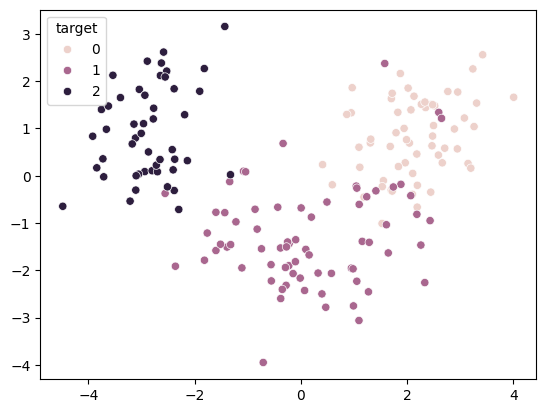

In [ ]:
sns.scatterplot(x=X_[:,0],y=X_[:,1],hue=y)